In [12]:
# Data Wrangling II operations using Python. (e.g.Academic_Performance.csv)
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.
# 2. Scan all numeric variables for outliers. If there are outliers,any of the suitable techniques to deal with them.(using z score)
# 3. Display and Remove the outliers
# 4. Apply data transformations on at least one of the variables Create bins and Labels.
# 5. Draw box plot

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset from CSV
df = pd.read_csv(r"C:\CODE\ds\DS\DS\PR_EXAM_DATASET\AcademicPerformance_New.csv")
# Preview data
df.head()


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [3]:
# Drop rows that are fully empty
df.dropna(how='all', inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Check for any remaining nulls
df.isnull().sum()


C:\Users\tanma\AppData\Local\Temp\ipykernel_28252\4172175035.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_28252\4172175035.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

In [4]:
# Detect outliers using Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)

# Display outlier rows
outlier_rows = df[(outliers).any(axis=1)]
print("Outliers Detected:")
outlier_rows


Outliers Detected:


,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
17,18.0,Rassia,18.0,32.0,28.0,26.0,D,Yes


In [5]:
# Remove outliers

print("Shape before removing outliers:", df.shape)
df_no_outliers = df[~(outliers).any(axis=1)]
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (98, 8)
Shape after removing outliers: (97, 8)


In [6]:
# Create performance bins
bins = [0, 50, 65, 75, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# Create new column with bins
df_no_outliers['Performance'] = pd.cut(df_no_outliers['Average'], bins=bins, labels=labels)

# Show value counts for new column
df_no_outliers['Performance'].value_counts()


C:\Users\tanma\AppData\Local\Temp\ipykernel_28252\9214832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Performance'] = pd.cut(df_no_outliers['Average'], bins=bins, labels=labels)


Performance
F    31
D    27
C    25
B    13
A     1
Name: count, dtype: int64

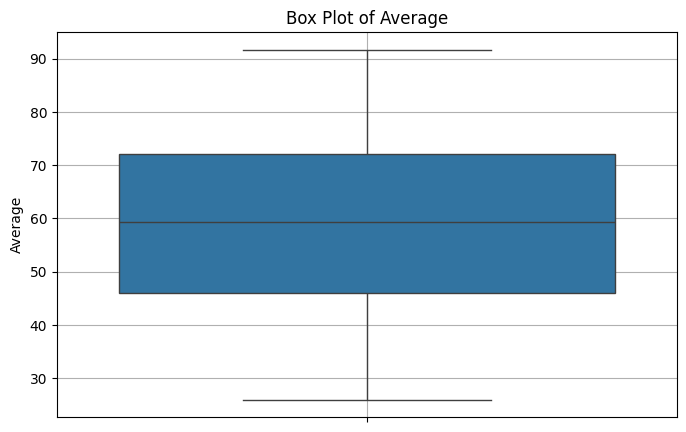

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_no_outliers['Average'])
plt.title('Box Plot of Average')
plt.grid()
plt.show()
